In [1]:
import pandas as pd 
import scipy.interpolate
import math
import numpy as np
import sympy as sp
from math import sin, tan, cos, ceil, exp, sqrt
import forallpeople as fp
fp.environment('structural', top_level= True)
import handcalcs.render
from handcalcs import handcalc

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+3">1. Datos de Disen&#771;o</font>
    
</h2>

<p style="font-family:'Cambria';font-size:20px">
    A continuación se presentan los datos entregados por el cliente, para el diseño de un Boxculvert:
    
</p>
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+2">1.1 Datos del terreno</font>
</p>
<p style="font-family:'Cambria';font-size:20px">   </p>


</body>
</html>

In [2]:
%%render 2 
Hrelleno = (1.5*m) # Altura de relleno

<IPython.core.display.Latex object>

In [3]:
%%render 2 params
gamma = (18*kN/m**3) #Peso especifico
Phi = (28) #Ángulo de fricción


<IPython.core.display.Latex object>

In [4]:
%%render 2 params
sigma_adm = (150*kN/m**2) # Esfuerzo admisible
Kb = 34500*kN/m**3 # Coeficiente de balastro

<IPython.core.display.Latex object>

In [5]:
%%render 2 params
Kb = 34500*kN/m**3

<IPython.core.display.Latex object>

<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+2">1.2 Datos de la geometría</font>
</p>

In [6]:
%%render 2 params
B = (4*m)
H = (3*m)
r = (7*cm) #Recubrimiento

<IPython.core.display.Latex object>

In [7]:
%%render 2 params
celdas = 2

<IPython.core.display.Latex object>

<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+2">1.3 Datos de materiales</font>
</p>

In [8]:
%%render 1 params
f_prime_c = 28*MPa
f_y = 420*MPa

<IPython.core.display.Latex object>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+3">2. Predimensionamiento de la estructura.</font>
    
</h2>

<p style="font-family:'Cambria';font-size:20px">
    A continuación se presentan las cargas muertas que serán soportadas por la estructura:
    
</p>

<h2 style=";font-family:'Cambria';">
    <font size="+2">2.1 Predimensionamiento de la losa superior.</font>
    
</h2>
<p style="font-family:'Cambria';font-size:20px">
    Se predimensiona, siguiendo la tabla 2.5.2.6.3-1 del CCP-2014
    
</p>
    
</body>
</html>

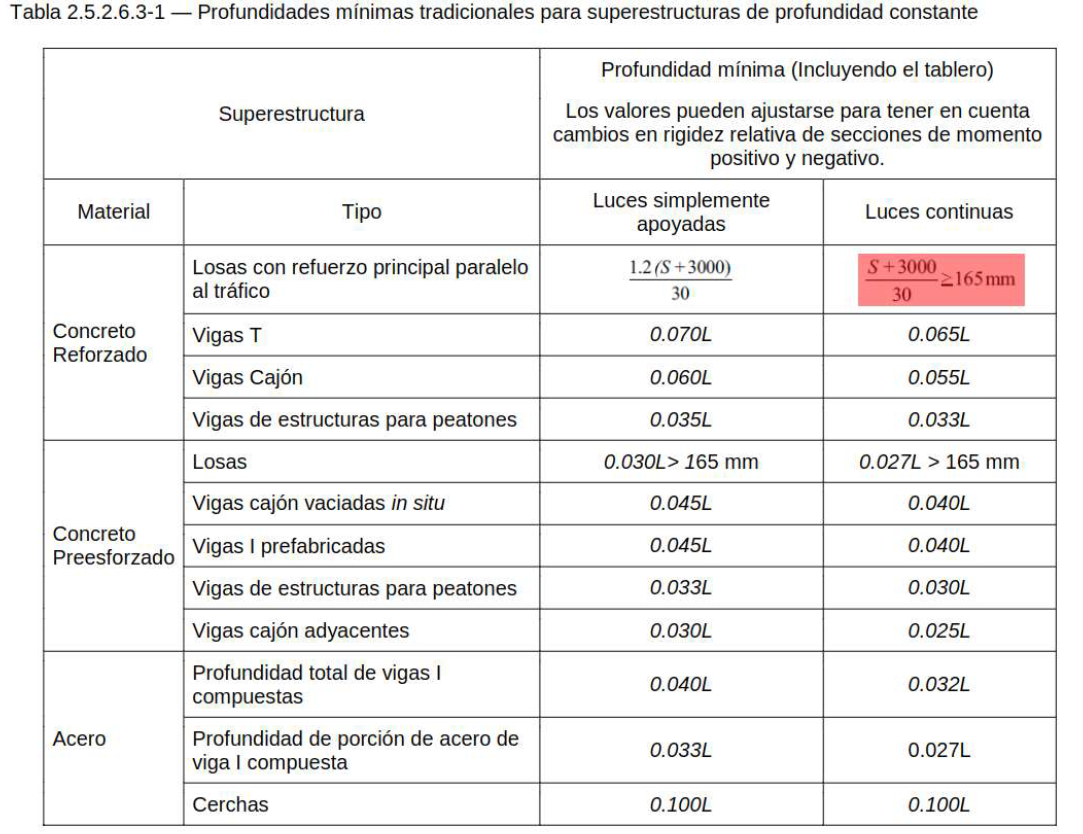

In [9]:
%%render 2
H_sup = (B+3000*mm)/30

<IPython.core.display.Latex object>

In [10]:
%%render 2 params

H_sup = 200*mm

<IPython.core.display.Latex object>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+2">2.2 Predimensionamiento de espesor de muros.</font>
    
</h2>
    
<p style="font-family:'Cambria';font-size:20px">
    Seguimos la tabla 36.5-1 del WisDOT bridge manual:
    
</p>
    
</body>
</html>

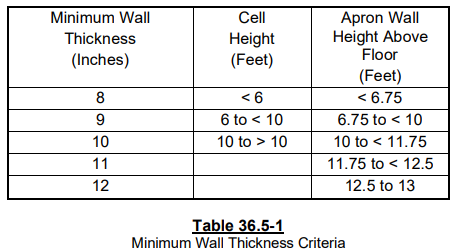

<html>
<body>
    
<p style="font-family:'Cambria';font-size:20px">
    Debido a la altura de muro de 3 metros el espesor mínimo de muro es de 9 pulgadas.
    
</p>
    
</body>
</html>

In [11]:
%%render 1 params
e_m = .25*m

<IPython.core.display.Latex object>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+2">2.3 Predimensionamiento de losa inferior.</font>
    
</h2>
    
<p style="font-family:'Cambria';font-size:20px">
    Haciendo uso de manual de diseño LFRD Bridge design:
    
</p>
    
</body>
</html>

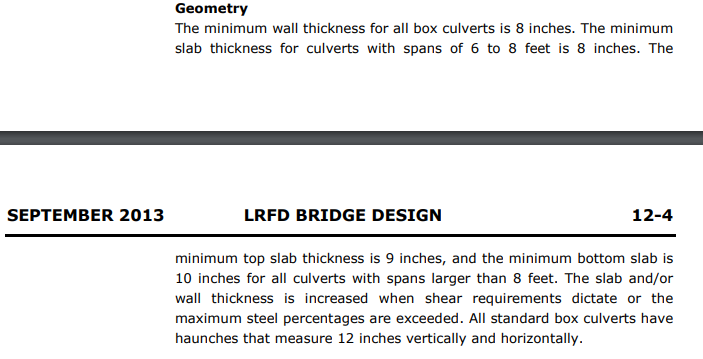

<html>
<body>
    
<p style="font-family:'Cambria';font-size:20px">
    Debido a que la luz es mayor a 8 pulgadas, la altura mínima para la losa inferior es de 10 pulgadas.
    
</p>
    
</body>
</html>

In [12]:
%%render 1 params

H_inf = 250*mm

<IPython.core.display.Latex object>

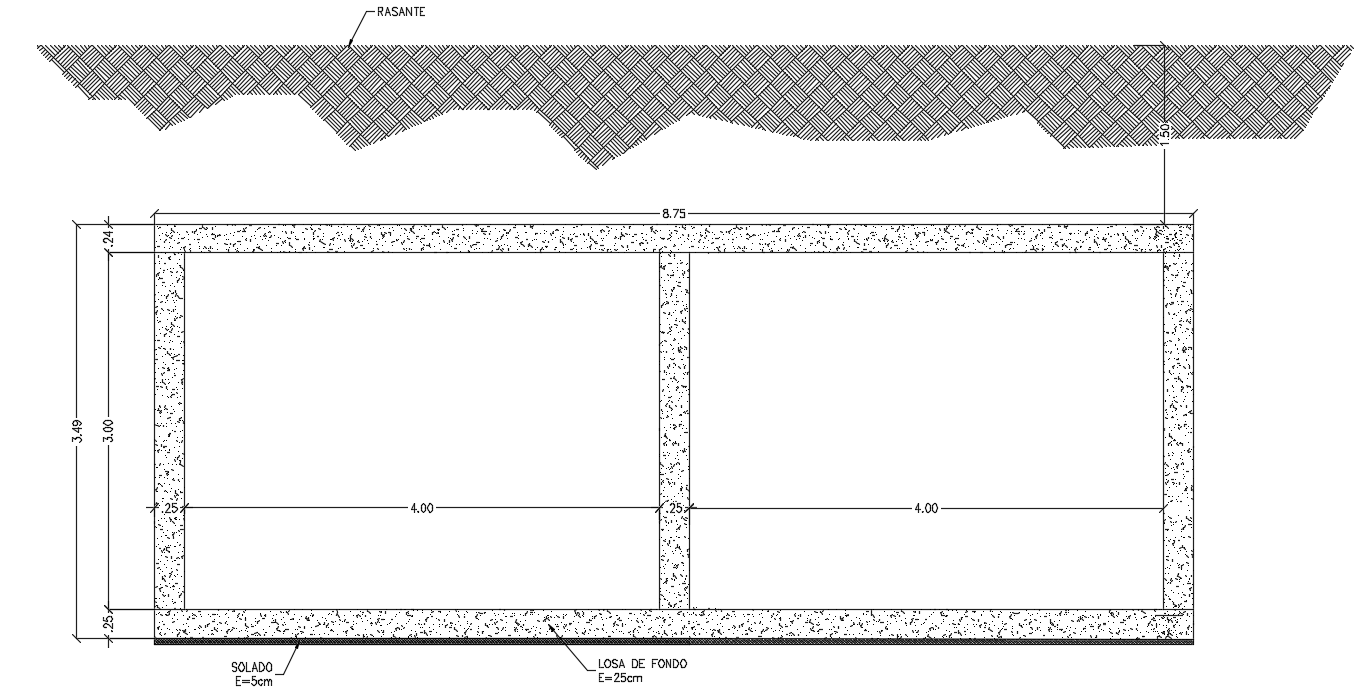

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+3">3. Análisis de cargas muertas</font>
    
</h2>

<p style="font-family:'Cambria';font-size:20px">
    A continuación se presentan las cargas muertas que serán soportadas por la estructura:
    
</p>

<h2 style=";font-family:'Cambria';">
    <font size="+2">3.1 Presión horizontal de suelo</font>
    
</h2>
    
</body>
</html>

<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">3.1.1 Coeficientes de presión</font>
</p>

In [13]:
%%render 2
K_0 = 1-sin(Phi)
K_a = tan(45-Phi/2)**2

<IPython.core.display.Latex object>

<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">3.1.2 Presión horizontal</font>
</p>

<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">El valor del coeficiente K se toma como el más crítico entre el coeficiente de reposo y el coeficiente activo:</font>
</p>

In [14]:
%%render 2
k = max(K_0, K_a)

<IPython.core.display.Latex object>

In [15]:
%%render 2 long
E_H_min = k*gamma*Hrelleno*1*m
E_H_max = k*gamma*(Hrelleno+H+H_sup+H_inf)*1*m


<IPython.core.display.Latex object>

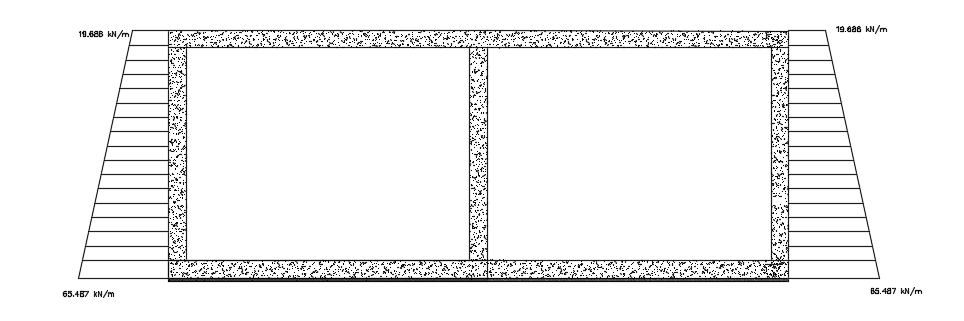

<html>
<body>


<h2 style=";font-family:'Cambria';">
    <font size="+2">3.2 Presión hidrostática</font>
    
</h2>

<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">Se cálcula las cargas producidas por el agua:</font>
</p>

    
</body>
</html>

In [16]:
%%render 2 params
gamma_W = 9.81*kN/m**3

<IPython.core.display.Latex object>

In [17]:
%%render 2 long
P_W1 = gamma_W*H*1*m # Carga lateral de agua



<IPython.core.display.Latex object>

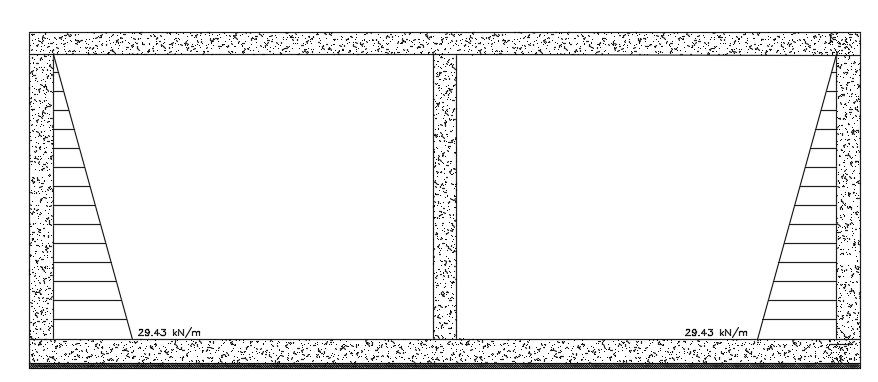

In [18]:
%%render 2
P_W2 = gamma_W*H*1*m # Carga vertical de agua

<IPython.core.display.Latex object>

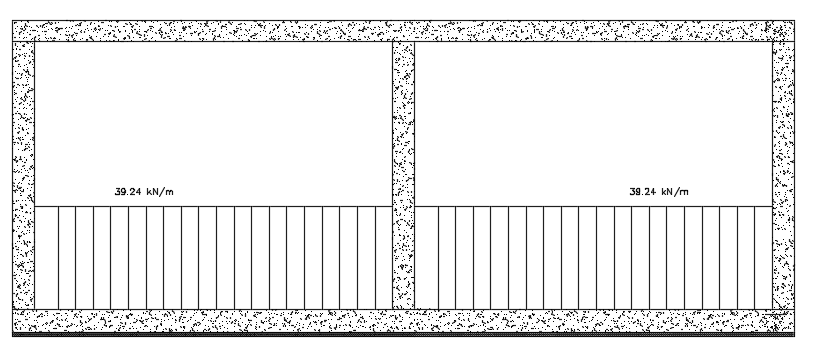

<html>
<body>


<h2 style=";font-family:'Cambria';">
    <font size="+2">3.3 Presión lateral por sobrecarga viva</font>
    
</h2>

<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">Se determina el efecto horizontal que tiene la sobrecarga viva en la estructura:</font>
</p>

    
</body>
</html>

In [19]:
y = [1200, 900, 600]
x = [1500, 3000, 6000]

In [20]:
y_interp = scipy.interpolate.interp1d(x, y)


In [21]:
%%render 1 params
h_eq_max = y_interp(H/mm)*mm
h_eq_min = y_interp((H+Hrelleno+H_sup+H_inf)/mm)*mm

<IPython.core.display.Latex object>

In [22]:
%%render 2  
L_S_max = k*gamma*h_eq_max*1*m
L_S_min = k*gamma*h_eq_min*1*m

<IPython.core.display.Latex object>

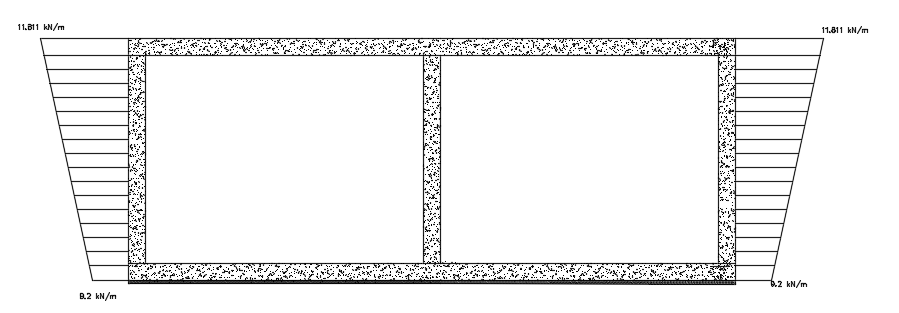

<html>
<body>


<h2 style=";font-family:'Cambria';">
    <font size="+2">3.4 Presión vertical del terreno</font>
    
</h2>

<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">Se calcula el peso del terreno sobre la estructura, para una instalación en zanja:</font>
</p>

    
</body>
</html>

In [23]:
%%render 2 params
B_c = 2*B+3*e_m
B_d = B_c+2*m

<IPython.core.display.Latex object>

In [24]:
%%render 2 
n =  Hrelleno/B_d


<IPython.core.display.Latex object>

In [25]:
%%render 4

K_u_prime = 0.1924

<IPython.core.display.Latex object>

In [26]:
%%render 4 long

C_d = (1-exp(-2*K_u_prime*n))/(2*K_u_prime)

<IPython.core.display.Latex object>

In [27]:
%%render 2 long

F_t = (C_d*B_d**2)/(Hrelleno*B)

F_e = 1+0.2*Hrelleno/B

<IPython.core.display.Latex object>

In [28]:
%%render 2

E_V = F_e*gamma*Hrelleno*1*m

<IPython.core.display.Latex object>

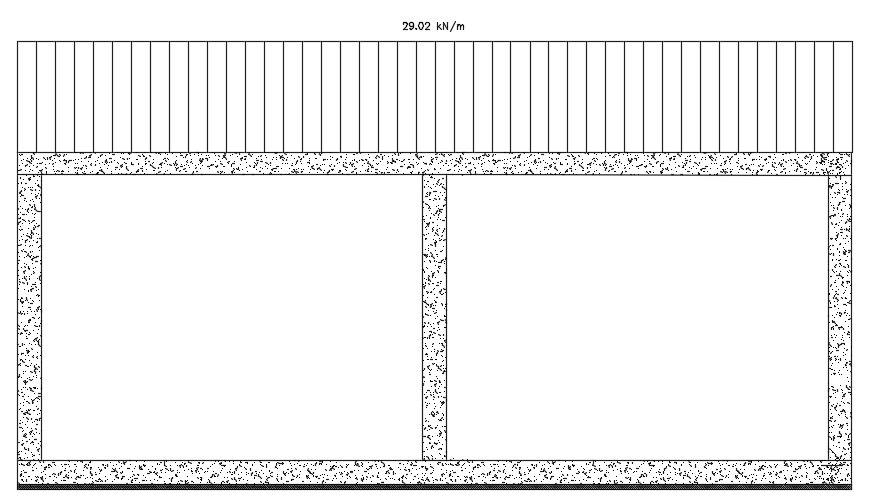

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+3">4. Análisis de cargas vivas</font>
    
</h2>

<p style="font-family:'Cambria';font-size:20px">
    A continuación se presentan las cargas vivas que serán soportadas por la estructura:
    
</p>

<h2 style=";font-family:'Cambria';">
    <font size="+2">4.1 Distribución de la carga viva montada en la parte superior</font>
    
</h2>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">4.1.1 Tráfico transversal al tramo.</font>
</p>
    
</body>
</html>

In [29]:
%%render 3

S_w = (1828*mm)


<IPython.core.display.Latex object>

In [30]:
%%render 1
W_t = (500*mm)
D_i = B

<IPython.core.display.Latex object>

In [31]:
%%render 2

LLDF = 1.15

<IPython.core.display.Latex object>

In [32]:
%%render 1
H_int_t = (S_w-W_t-0.06*D_i)/LLDF

<IPython.core.display.Latex object>

<html>
<body>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">4.1.2 Área de distribución para Tandem.</font>
</p>
    
</body>
</html>

In [33]:
%%render 2 long
W_w = W_t+S_w+LLDF*Hrelleno+0.06*D_i
L_t = (250*mm)
S_at = (1.2*m)
L_w = L_t+S_at+LLDF*Hrelleno

A_ll =L_w*W_w

IM = 33*(1-4.1e-4/mm*Hrelleno)  #Amplificación dinámica.

m1 = 1.2   #Factor de presencia múltiple.

<IPython.core.display.Latex object>

In [34]:
IM = IM/100

In [35]:
%%render 2

PL_t = (125*kN*(1+IM)*m1)/A_ll*1*m

<IPython.core.display.Latex object>

<html>
<body>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">4.1.3 Área de distribución para Camión.</font>
</p>
    
</body>
</html>

In [36]:
%%render 2 long
W_w = W_t+S_w+LLDF*Hrelleno+0.06*D_i
L_t = (250*mm)
S_ac = (4.3*m)
L_w = L_t+S_ac+LLDF*Hrelleno

A_ll =L_w*W_w

IM = 33*(1-4.1e-4/mm*Hrelleno)  #Amplificación dinámica.

m1 = 1.2   #Factor de presencia múltiple.

<IPython.core.display.Latex object>

In [37]:
IM = IM/100

In [38]:
%%render 2

PL_c = (160*kN*(1+IM)*m1)/A_ll*1*m

<IPython.core.display.Latex object>

<html>
<body>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1"> Finalmente, se escoge el mayor resultado, para la carga viva.</font>
</p>
    
</body>
</html>

In [39]:
%%render 2
PL = max(PL_t,PL_c)

<IPython.core.display.Latex object>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+3">5. Análisis estructural mediante SAP2000</font>
    
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Es necesario modelar las cargas obtenidas en el programa de SAP2000, para determinar los esfuerzos soportados por la estructura.
    
</p>

<h2 style=";font-family:'Cambria';">
    <font size="+2">5.1 Resumen de cargas</font>
    
</h2>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1"> Para ingresar los datos, se organizan los mismos dentro de una tabla.</font>
</p>
    
</body>
</html>

In [40]:
resumen = pd.DataFrame(columns=['Cargas'], index=['Ev', 'EH(min)', 'EH(max)',
                                                  'WA1','WA2', 'Ls(min)', 'Ls(max)', 'PL'])
resumen.iloc[0,0] = E_V
resumen.iloc[1,0] = E_H_min
resumen.iloc[2,0] = E_H_max
resumen.iloc[3,0] = P_W1
resumen.iloc[4,0] = P_W2
resumen.iloc[5,0] = L_S_min
resumen.iloc[6,0] = L_S_max
resumen.iloc[7,0] = PL
resumen

,Cargas
Ev,29.025 kN/m
EH(min),19.686 kN/m
EH(max),64.962 kN/m
WA1,29.430 kN/m
WA2,29.430 kN/m
Ls(min),9.252 kN/m
Ls(max),11.811 kN/m
PL,12.403 kN/m


<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+2">5.2 Análisis de resortes.</font>
    
</h2>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1"> Para obtener datos más confiables, se necesita modelar el programa apoyado en una cama de resortes; por lo cual es necesario calcular los coeficientes de los resortes a utilizar.</font>
</p>
    
</body>
</html>

In [41]:
%%render 2
Kb
Phi

<IPython.core.display.Latex object>

<html>
<body>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1"> Se separó la base en 26 nodos, 24 nodos interiores y 2 exteriores, con esto podemos calcular el ancho aferente de cada nodo.</font>
</p>
    
</body>
</html>

In [42]:
%%render 2
L_cc = 8.5 #Longitud de centro a centro.

N_nodos = 26 #Número de nodos.



<IPython.core.display.Latex object>

In [43]:
%%render 2 short
Ancho_int = L_cc/N_nodos*m #Ancho aferente de los resortes interiores
A_int = Ancho_int*1*m

<IPython.core.display.Latex object>

In [44]:
%%render 2 short
Ancho_ext = Ancho_int/2 #Ancho aferente de los resortes interiores
A_ext = Ancho_ext*1*m

<IPython.core.display.Latex object>

In [45]:
resortes = pd.DataFrame(columns=['Ancho', 'Largo', 'Área', 'KSv', 'KSh'], index=['int', 'Ext'])

resortes.iloc[0,0] = Ancho_int
resortes.iloc[0,1] = 1*m
resortes.iloc[0,2] = A_int
resortes.iloc[0,3] = resortes.iloc[0,2]*Kb
resortes.iloc[0,4] = resortes.iloc[0,3]*(1-sin(Phi))

resortes.iloc[1,0] = Ancho_ext
resortes.iloc[1,1] = 1*m
resortes.iloc[1,2] = A_ext
resortes.iloc[1,3] = resortes.iloc[0,2]*Kb
resortes.iloc[1,4] = resortes.iloc[0,3]*(1-sin(Phi))


resortes

,Ancho,Largo,Área,KSv,KSh
int,326.923 mm,1.000 m,326923.077 mm²,11.279 MN/m,8.223 MN/m
Ext,163.462 mm,1.000 m,163461.538 mm²,11.279 MN/m,8.223 MN/m


<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+2">5.3 Análisis estructural.</font>
    
</h2>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1"> Se introducen las cargas mayoradas dentro del programa de SAP2000 para obtener los momentos últimos de diseño.</font>
</p>
    
</body>
</html>

<html>
<body>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">5.3.1 Análisis de cargas en servicio.</font>
</p>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1"> Se toman las cargas en estado de servicio tomando los valores máximos para positivos y negativos, dentro de las supocisiones de carga.</font>
</p>
    
</body>
</html>

<html>
<body>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+0">5.3.1.1 Diagrama de cortante para cargas de servicio (kN).</font>
</p>
    
</body>
</html>

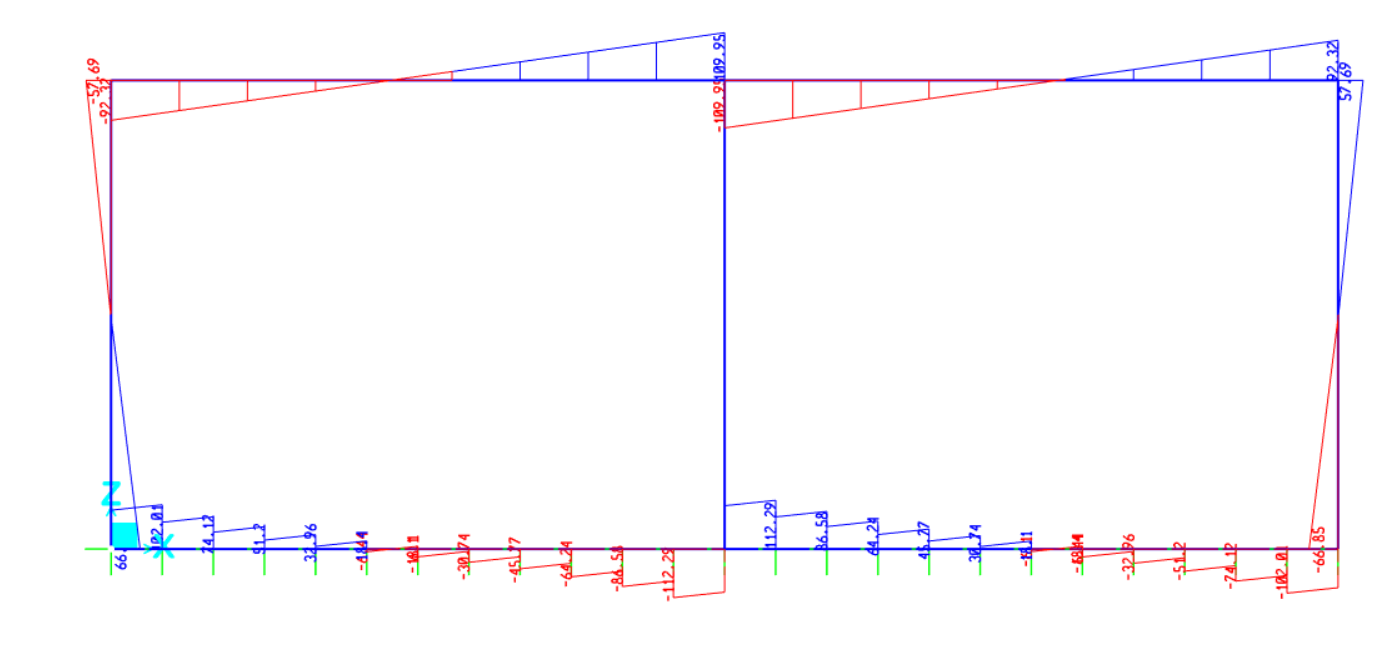



In [46]:
V_s = 101.856*kN
V_i = 117.826*kN
V_m_ext = 58.526*kN
V_m_int = 31.061*kN

In [47]:
VServicio = pd.DataFrame(columns=['Cortante'], index=['Losa Sup.', 'Losa Inf.', 'Muro. Ext.', 'Muro. Int.'])

VServicio.iloc[0,0] = V_s
VServicio.iloc[1,0] = V_i
VServicio.iloc[2,0] = V_m_ext
VServicio.iloc[3,0] = V_m_int

VServicio

,Cortante
Losa Sup.,101.856 kN
Losa Inf.,117.826 kN
Muro. Ext.,58.526 kN
Muro. Int.,31.061 kN


<html>
<body>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+0">5.3.1.2 Diagrama de Momentos para cargas de servicio (kN-m).</font>
</p>
    
</body>
</html>

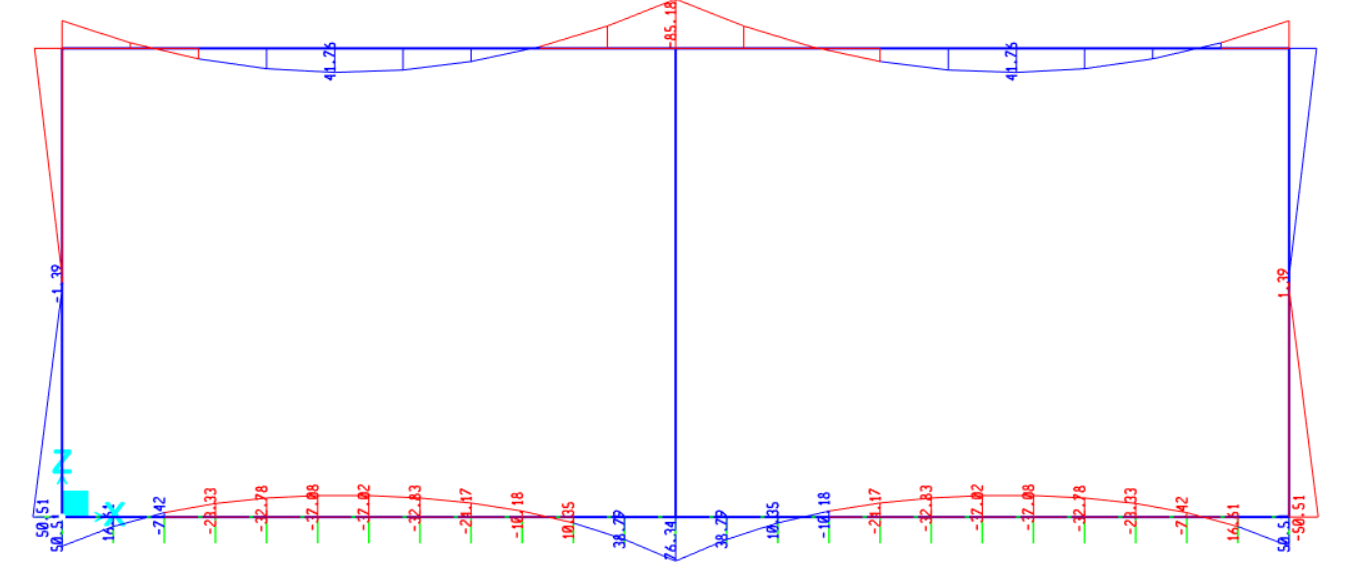

In [48]:
M_ls_pos = 42.27*kN*m

M_li_pos = 83*kN*m

M_mExt_pos = 61.02*kN*m

M_mInt_pos = 67.02*kN*m

M_ls_neg = 86.15*kN*m

M_li_neg = 37.08*kN*m

M_mExt_neg = 61.02*kN*m

M_mInt_neg = 61.02*kN*m

In [49]:
MServicio = pd.DataFrame(columns=['M(+)', 'M(-)'], index=['Losa Sup.', 'Losa Inf.', 'Muros. Ext.', 'Muro. Int.'])

MServicio.iloc[0, 0] = M_ls_pos
MServicio.iloc[1, 0] = M_li_pos
MServicio.iloc[2, 0] = M_mExt_pos
MServicio.iloc[3, 0] = M_mInt_pos

MServicio.iloc[0, 1] = M_ls_neg
MServicio.iloc[1, 1] = M_li_neg
MServicio.iloc[2, 1] = M_mExt_neg
MServicio.iloc[3, 1] = M_mInt_neg

MServicio

,M(+),M(-)
Losa Sup.,42.270 kN·m,86.150 kN·m
Losa Inf.,83.000 kN·m,37.080 kN·m
Muros. Ext.,61.020 kN·m,61.020 kN·m
Muro. Int.,67.020 kN·m,61.020 kN·m


<html>
<body>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+0">5.3.1.3 Factores de mayoración.</font>
</p>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1"> Se presentan los factores de mayoración utilizados en el calculo de los momentos últimos.</font>
</p>
    
</body>
</html>

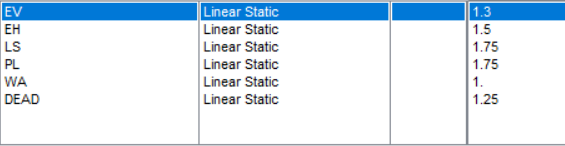

<html>
<body>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+0">5.3.1.4 Diagrama de Cortantes para cargas últimas (kN).</font>
</p>
    
</body>
</html>

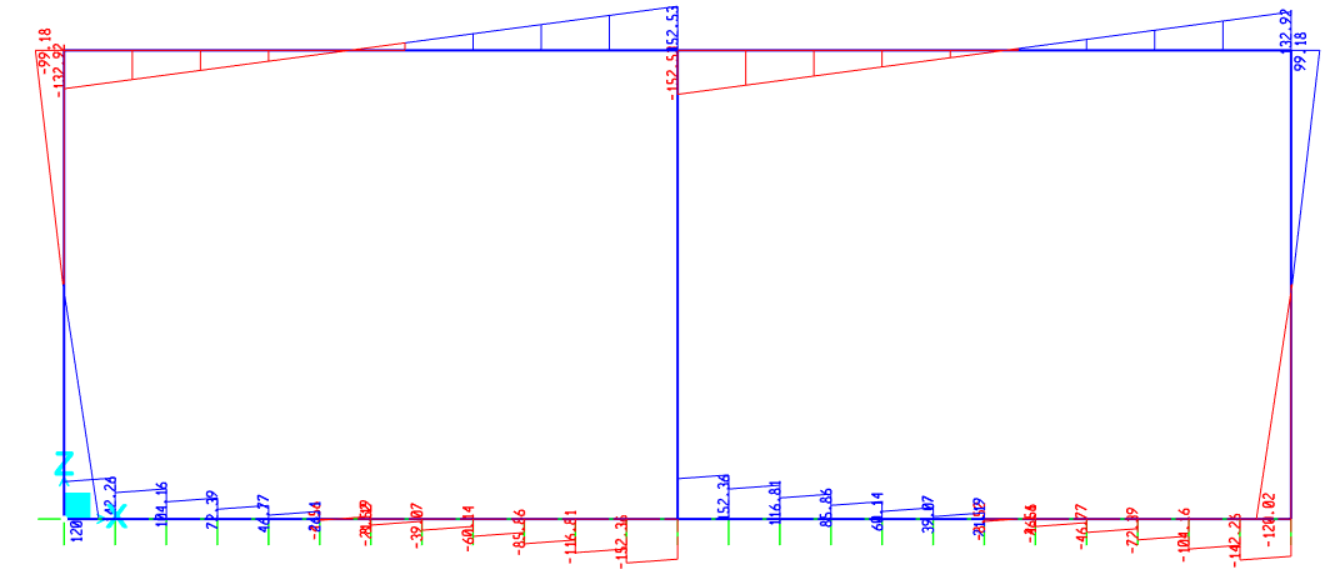

In [50]:
Vu_s = 141.11*kN
Vu_i = 152.36*kN
Vu_Mext = 107.057*kN
Vu_Mint = 31.061*kN

In [51]:
VUltimo = pd.DataFrame(columns=['Cortante'], index=['Losa Sup.', 'Losa Inf.', 'Muros. Ext.', 'Muro. Int.'])

VUltimo.iloc[0, 0] = Vu_s
VUltimo.iloc[1, 0] = Vu_i
VUltimo.iloc[2, 0] = Vu_Mext
VUltimo.iloc[3, 0] = Vu_Mint

VUltimo

,Cortante
Losa Sup.,141.110 kN
Losa Inf.,152.360 kN
Muros. Ext.,107.057 kN
Muro. Int.,31.061 kN


<html>
<body>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+0">5.3.1.5 Diagrama de Momentos para cargas últimas (kN-m).</font>
</p>
    
</body>
</html>

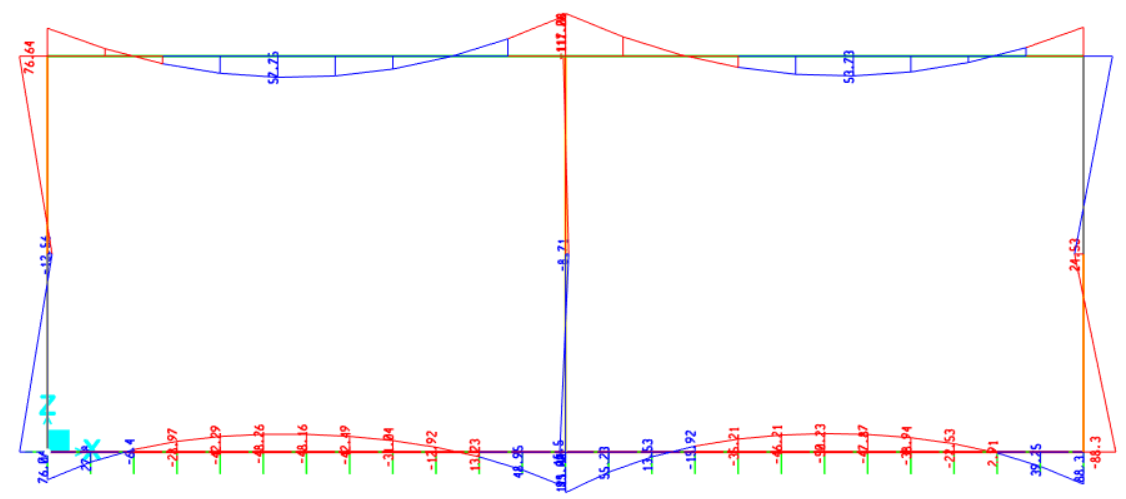

In [52]:
M_uLs_pos = 57.75*kN*m

M_uLi_pos = 111.073*kN*m

M_uMext_pos = 77.8*kN*m

M_uMint_pos = 77.8*kN*m

M_uLs_neg = 116.11*kN*m

M_uLi_neg = 50.05*kN*m

M_uMext_neg = 88.3*kN*m

M_uMint_neg = 88.3*kN*m

<!DOCTYPE html>
<html>
<body>

<h3 style=";font-family:'Cambria';">
    <font size="+2">5.3. Diseño para momento positivo. </font>
    
</h3>
    
<p style="font-family:'Cambria';font-size:20px">
    Se comienza el cálculo de la cantidad de acero inferior del puente.
    
</p>

</body>
</html>

<!DOCTYPE html>
<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">5.3.1. Cuantía de acero.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Se realiza el cálculo de la cuantía de acero requerido.
    
</p>

</body>
</html>

In [53]:
%%render 2 params
f_prime_c
f_y
rec = 7*cm
d = H_sup - rec
phi = 0.9
b = (1*m) 

<IPython.core.display.Latex object>

In [54]:
%%render 2 short
R_n = M_uLs_pos/(phi*b*d**2)


<IPython.core.display.Latex object>

In [55]:
%%render 6 short
rho = ((0.85*f_prime_c)/f_y)*(1-sqrt(1-(2*R_n)/(0.85*f_prime_c)))

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">5.3.2. Cuantía mínima de acero.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Se determinan los parámetros requeridos para realizar el cálculo del momento para la cuantía mínima.
</p>
        
<h1 style=";font-family:'Cambria';">
    <font size="+0">5.3.2.1. Cálculo del módulo de sección para losa.</font>
</h1>

</body>
</html>

In [56]:
%%render 2
f_r = 0.62*sqrt(f_prime_c)*MPa
E_c = 4800*sqrt(f_prime_c)*MPa
E_s = (200e3*MPa)
S_c = (b*H_sup**2)/6

<IPython.core.display.Latex object>

In [57]:
%%render 1
S_c

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">5.3.2.2. Especificación de valores de gamma.</font>
</h1>

</body>
</html>

In [58]:
%%render 2 params
gamma_1 = 1.6  # Factor de variación de la fisuración por flexión. 
gamma_2 = 0    # Factor de variación del preesfuerzo.
gamma_3 = 0.67 # Relación resistencia especificada a fluencia y resistencia última a tracción.

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">5.3.2.3. Verificación del criterio de cumplimiento</font>
</h1>

</body>
</html>

In [59]:
%%render 2
verificacion = 1.33*M_uLs_pos

<IPython.core.display.Latex object>

In [60]:
%%render 2 short
Mcr = gamma_3*((gamma_1*f_r)*S_c)

<IPython.core.display.Latex object>

In [61]:
 M_min = min(Mcr, verificacion)

In [62]:
%%render
if M_min <= M_uLs_pos: condicion = f'{M_min}\quad --> \quad Cumple'
elif M_min > M_uLs_pos: condicion = f'{M_min} --> \quad No\quad cumple'; M_min

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">5.3.3. Cálculo de cantidad de acero.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Habiendo realizado la verificación; se calcula la cantidad de acero necesaria para soportar el momento último.
    
</p>

</body>
</html>

In [63]:
%%render
A_s = rho*b*d


<IPython.core.display.Latex object>

In [64]:
%%render params
A_s = A_s/cm**2*cm**2

<IPython.core.display.Latex object>

In [65]:
%%render
a = A_s*f_y/(0.85*f_prime_c*b)

<IPython.core.display.Latex object>

In [66]:
a = a/cm

In [67]:
%%render
a = (a*cm)

<IPython.core.display.Latex object>

In [68]:
aceros =[0.250, 0.375, 0.500,
       0.625,0.750, 0.875, 1.000, 1.125,
       1.250, 1.375, 1.750, 2.25]
nombres = ['N2','N3','N4','N5','N6','N7','N8','N9','N10','N11','N14','N18']

In [69]:
for i in range(len(aceros)):
    area = np.pi/4*(aceros[i]*2.54)**2
    numero_barras = ceil(A_s/area)
#     print(numero_barras)
    separacion = 1/numero_barras
    s = separacion
#     print(s)
    barra = nombres[i]
    if s >= 0.1 and s <= 0.15:
        break

In [70]:
area = area*cm**2
s = s*100

<!DOCTYPE html>
<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">5.3.4. Configuración de aceros.</font>
</h2>

</body>
</html>

In [71]:
%%render 2 params
colocar = str(1) + barra +"c/" + str(round(separacion,1))

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">5.3.5. Control de agrietamiento.</font>
</h2>
    
<p style="font-family:'Cambria';font-size:20px">
    Se verifica que el acero no tenga una separación muy grande, esto buscando evitar agrietamientos en la losa del puente.
    
</p>

</body>
</html>

In [72]:
%%render 2 params
gamma_e = (0.75)   # Factor de exposición
d_c = (rec)        # Espesor de recubrimiento de conctreto.
h = (H_sup)         # Altura de la losa
n = (E_s/E_c)       # Factor modular de acero

<IPython.core.display.Latex object>

In [73]:
x = sp.Symbol('x')

<!DOCTYPE html>
<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">5.3.5.1. Determinación del momento de inercia.</font>
</h1>

</body>
</html>

In [74]:
%%render 2
x = sp.nsolve((float(b/cm)*x**2)/2+ float(A_s)*x - n*float(A_s)*d, x, 0)


<IPython.core.display.Latex object>

In [75]:
x = float(x)

In [76]:
%%render 2
x = (x*cm)


<IPython.core.display.Latex object>

In [77]:
%%render 
y_t = d-x

<IPython.core.display.Latex object>

In [78]:
%%render
I = (b*(x)**3)/3+n*A_s*(d-x)**2


<IPython.core.display.Latex object>

In [79]:
%%render
I = (I/cm**4*cm**4)

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">5.3.5.2. Momento de servicio.</font>
</h1>

</body>
</html>

In [80]:
agrietamiento = MServicio.iloc[:,0:1]
agrietamiento

,M(+)
Losa Sup.,42.270 kN·m
Losa Inf.,83.000 kN·m
Muros. Ext.,61.020 kN·m
Muro. Int.,67.020 kN·m


In [81]:
M_s = MServicio.iloc[0, 0]

<!DOCTYPE html>
<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">5.3.5.3. Cálculo de esfuerzo a tracción del acero en estado límite.</font>
</h1>

</body>
</html>

In [82]:
%%render
sigma_s = n*(M_s*y_t)/I

<IPython.core.display.Latex object>

In [83]:
%%render
if sigma_s <= 0.6*f_y: condicion = f'{sigma_s}\quad --> \quad Cumple'
elif sigma_s > 0.6*f_y: condicion = f'{sigma_s} --> \quad No\quad cumple'; sigma_s

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">5.3.5.4. Separación máxima permitida.</font>
</h1>

</body>
</html>

In [84]:
%%render 2 short
beta_s = 1+d_c/(0.7*(h-d_c))

<IPython.core.display.Latex object>

In [85]:
d_c = d_c/mm

In [86]:
%%render 2 long
s_max = ((123000*MPa*gamma_e)/(beta_s*sigma_s)*mm)-2*d_c*mm

<IPython.core.display.Latex object>

In [87]:
%%render
if separacion <= s_max: condicion = f'{separacion}\quad --> \quad Cumple'
elif separacion > s_max: condicion = f'{separacion} --> \quad No\quad cumple'; separacion = s_max

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>

<h3 style=";font-family:'Cambria';">
    <font size="+2">5.4. Refuerzo de retracción por temperatura. </font>
    
</h3>
    
<p style="font-family:'Cambria';font-size:20px">
    Se calcula el acero necesario para evitar el agrietamiento producido por la variación de la temperatura
    
</p>

</body>
</html>

In [88]:
%%render 2
A_st = (0.18*b*h)/(2*(b+h))*cm

<IPython.core.display.Latex object>

In [89]:
for i in range(len(aceros)):
    area = np.pi/4*(aceros[i]*2.54)**2
    numero_barras = ceil(A_st/area)
#     print(numero_barras)
    separacion = 1/numero_barras
    s = separacion
#     print(s)
    barra = nombres[i]
    if s >= 0.15:
        s = s_max
        break
        
else: 
     print('NN')

<!DOCTYPE html>
<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">5.4.1. Configuración de aceros.</font>
</h2>

</body>
</html>

In [90]:
s = s/mm
s = s/1000

In [91]:
%%render 2 params
colocar = str(1) + barra +"c/" + str(round(s,2))

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>

<h3 style=";font-family:'Cambria';">
    <font size="+2">5.5. Refuerzo de distribución. </font>
    
</h3>
    
<p style="font-family:'Cambria';font-size:20px">
    Es necesario un acero de distribución para que las cargas sean transferidas correctamente a los aceros principales.
    
</p>

</body>
</html>

In [92]:
S = 5000

In [93]:
%%render 2
dist = ceil((1750*mm)/(sqrt(S)*mm)) #%

<IPython.core.display.Latex object>

In [94]:
%%render 2
A_sd = dist/100*A_s

<IPython.core.display.Latex object>

In [95]:
for i in range(len(aceros)):
    area = np.pi/4*(aceros[i]*2.54)**2
    numero_barras = ceil(A_sd/area)
#     print(numero_barras)
    separacion = 1/numero_barras
    s = separacion
#     print(s)
    barra = nombres[i]
    if s >= 0.10 and s <= 0.15:
        break

In [96]:
%%render 2 params
colocar = str(1) + barra +"c/" + str(round(separacion,1))

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>

<h3 style=";font-family:'Cambria';">
    <font size="+2">5.6. Diseño para momento negativo. </font>
    
</h3>
    
<p style="font-family:'Cambria';font-size:20px">
    Se comienza el cálculo de la cantidad de acero superior del puente.
    
</p>

</body>
</html>

<!DOCTYPE html>
<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">5.6.1. Cuantía de acero.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Se realiza el cálculo de la cuantía de acero requerido.
    
</p>

</body>
</html>

In [97]:
%%render 2 short
R_n = M_u_negativo/(phi*b*d**2)

NameError: name 'M_u_negativo' is not defined

In [98]:
%%render 6 long
rho = ((0.85*f_prime_c)/f_y)*(1-sqrt(1-(2*R_n)/(0.85*f_prime_c)))

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">5.6.2. Cuantía mínima de acero.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Se determinan los parámetros requeridos para realizar el cálculo del momento para la cuantía mínima.
</p>
        
<h1 style=";font-family:'Cambria';">
    <font size="+0">5.6.2.1. Verificación del criterio de cumplimiento</font>
</h1>

</body>
</html>

In [99]:
%%render 2
verificacion = 1.33*M_u_negativo

NameError: name 'M_u_negativo' is not defined

In [100]:
%%render 2 short
Mcr = gamma_3*((gamma_1*f_r)*S_c)

<IPython.core.display.Latex object>

In [101]:
 M_min = min(Mcr, verificacion)

In [102]:
%%render
if M_min <= M_u_negativo: condicion = f'{M_min}\quad --> \quad Cumple'
elif M_min > M_u_negativo: condicion = f'{M_min} --> \quad No\quad cumple'; M_min

NameError: name 'M_u_negativo' is not defined

<!DOCTYPE html>
<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">5.6.3. Cálculo de cantidad de acero.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Habiendo realizado la verificación; se calcula la cantidad de acero necesaria para soportar el momento último.
    
</p>

</body>
</html>

In [103]:
%%render
A_s = rho*b*d


<IPython.core.display.Latex object>

In [104]:
%%render params
A_s = A_s/cm**2*cm**2

<IPython.core.display.Latex object>

In [105]:
for i in range(len(aceros)):
    area = np.pi/4*(aceros[i]*2.54)**2
    numero_barras = ceil(A_s/area)
#     print(numero_barras)
    separacion = 1/numero_barras
    s = separacion
#     print(s)
    barra = nombres[i]
    d_b = aceros[i]*2.54*cm
    if s >= 0.10 and s <= 0.15:
        break

In [106]:
area = area*cm**2
s = s*100

<!DOCTYPE html>
<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">5.6.4. Configuración de aceros.</font>
</h2>

</body>
</html>

In [107]:
%%render 2 params
colocar = str(1) + barra +"c/" + str(round(separacion,1))

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+3"> 6. Diseño a cortante. </font>
    
</h2>

<p style=";font-family:'Cambria';font-size:20px">
    La losa se diseña para que no sea necesario acero de refuerzo (estribos), es decir, todo el cortante es resistido por el concreto.
</p>

</body>
</html>


<!DOCTYPE html>
<html>
<body>

<h3 style=";font-family:'Cambria';">
    <font size="+2">6.1. Resumen datos de carga por cortante. </font>
    
</h3>
    
<p style="font-family:'Cambria';font-size:20px">
    Para mayor comodidad se obtienen los datos de cargas por cortante y se mayoran para obtener el valor de cortante último.
    
</p>

</body>
</html>

In [108]:
cortante = pd.DataFrame(columns=['CARGA', 'Vs (kN)', 'FS', 'Vu (kN)'], index=np.arange(1,4))
cortante['CARGA'] = ['Vdc', 'Vdw', 'Vll']
cortante['FS'] = [1.25, 1.5, 1.75]
cortante['Vs (kN)'] = [V_DC, V_DW, V_ll]
cortante['Vu (kN)'] = cortante['Vs (kN)']*cortante['FS']
cortante.loc[4, 'FS'] = 'Vu'
cortante.loc[4, 'CARGA'] = 'Vs'
cortante.loc[4, 'Vs (kN)'] = cortante.loc[1:3, 'Vs (kN)'].sum()
cortante.loc[4, 'Vu (kN)'] = cortante.loc[1:3, 'Vu (kN)'].sum()

cortante

NameError: name 'V_DC' is not defined

<!DOCTYPE html>
<html>
<body>

<h3 style=";font-family:'Cambria';">
    <font size="+2">6.2. Profundidad efectiva por cortante. </font>
    
</h3>
    
<p style="font-family:'Cambria';font-size:20px">
    Distancia perpendicular al eje neutro, entre resultantes de las fuerzas de tracción y compresión por flexión.
    
</p>

</body>
</html>

In [ ]:
%%render
d_v = d-a/2

In [ ]:
%%render
maximo =  max(0.9*d,0.72*h)

In [ ]:
%%render
if d_v >= maximo : condicion = f'{d_v}\quad --> \quad Cumple'
elif d_v < maximo: condicion = f'{d_v} --> \quad No\quad cumple'

In [ ]:
%%render
if d_v < maximo:
    d_v = maximo

<!DOCTYPE html>
<html>
<body>

<h3 style=";font-family:'Cambria';">
    <font size="+2">6.3. Verificación de resistencia nominal. </font>
    
</h3>
    
<p style="font-family:'Cambria';font-size:20px">
    Se verifica que la resistencia nominal sea mayor al cortante último.
    
</p>

</body>
</html>

In [ ]:
V_u = cortante.iloc[3,3]


In [ ]:
%%render
V_c1 = 0.25*f_prime_c*b*d_v
V_c2 = 0.53*sqrt(f_prime_c)*MPa*b*d_v
V_n = min(V_c1, V_c2)

In [ ]:
%%render
if V_u <= phi*V_n : condicion = f'{V_u}\quad --> \quad Cumple'
elif V_u > phi*V_n: condicion = f'{V_u} --> \quad No\quad cumple'

<!DOCTYPE html>
<html>
<body>

<h3 style=";font-family:'Cambria';">
    <font size="+2">7. Longitud de desarrollo para el momento negativo. </font>
    
</h3>
    
<p style="font-family:'Cambria';font-size:20px">
    Se establecen los criterios para hallar la logitud de desarrollo en función del punto de inflexión.   
</p>
<p style="font-family:'Cambria';font-size:20px">
    la longitud de la varilla después del punto de inflexión no debe ser menor a <b>12 db, d o l/6 </b>
    
</p>

</body>
</html>

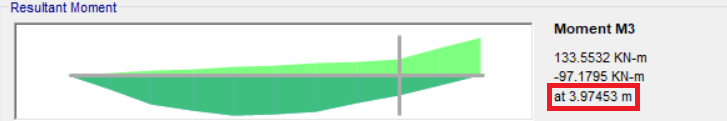

In [ ]:
l=l*cm/10

In [ ]:
%%render 
l_d = max(12*d_b,d,l/6)

In [ ]:
l_d = ceil(l_d)

In [ ]:
%%render 2
l_d